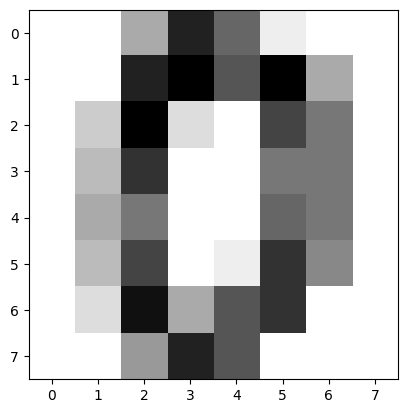

In [130]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [131]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [133]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [134]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9916666666666667
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  0  1  0 41]]


In [135]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9555555555555556
[[40  0  0  0  0  1  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  2  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 1  0  0  0 33  0  0  0  0  0]
 [ 0  1  1  0  0 33  0  2  0  1]
 [ 0  0  0  0  0  1 30  0  1  0]
 [ 0  0  0  0  0  0  0 36  1  0]
 [ 0  2  1  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  1 41]]


In [136]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8194444444444444
[[39  0  0  0  2  0  0  0  0  0]
 [ 0 25  0  0  3  0  0  0  8  1]
 [ 1  1 23  1  1  0  0  2  1  0]
 [ 0  1  3 27  0  0  0  1  1  2]
 [ 0  0  0  2 27  0  2  1  1  1]
 [ 0  0  0  1  1 35  0  0  0  1]
 [ 2  1  1  0  1  0 27  0  0  0]
 [ 0  1  1  1  2  0  0 31  0  1]
 [ 0  2  1  3  1  1  0  0 26  0]
 [ 1  2  0  0  0  3  0  1  0 35]]


In [137]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Dense(50,input_shape=(64,),activation='sigmoid'))
model.add(Dense(40,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 50)                3250      
                                                                 
 dense_41 (Dense)            (None, 40)                2040      
                                                                 
 dense_42 (Dense)            (None, 30)                1230      
                                                                 
 dense_43 (Dense)            (None, 10)                310       
                                                                 
Total params: 6,830
Trainable params: 6,830
Non-trainable params: 0
_________________________________________________________________


In [138]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 2.0067 - accuracy: 0.2839 - val_loss: 1.5615 - val_accuracy: 0.4750
Epoch 2/100
45/45 [==============================] - 0s 625us/step - loss: 1.0364 - accuracy: 0.6409 - val_loss: 0.8708 - val_accuracy: 0.7250
Epoch 3/100
45/45 [==============================] - 0s 665us/step - loss: 0.7043 - accuracy: 0.7731 - val_loss: 0.8487 - val_accuracy: 0.7361
Epoch 4/100
45/45 [==============================] - 0s 668us/step - loss: 0.6410 - accuracy: 0.7843 - val_loss: 0.8103 - val_accuracy: 0.7389
Epoch 5/100
45/45 [==============================] - 0s 659us/step - loss: 0.5783 - accuracy: 0.8225 - val_loss: 0.6593 - val_accuracy: 0.8250
Epoch 6/100
45/45 [==============================] - 0s 647us/step - loss: 0.6502 - accuracy: 0.7801 - val_loss: 0.7165 - val_accuracy: 0.7806
Epoch 7/100
45/45 [==============================] - 0s 648us/step - loss: 0.5941 - accuracy: 0.7954 - val_loss: 0.6518 - val_accuracy: 0.8000
E

Epoch 58/100
45/45 [==============================] - 0s 679us/step - loss: 0.2849 - accuracy: 0.9158 - val_loss: 0.5326 - val_accuracy: 0.8500
Epoch 59/100
45/45 [==============================] - 0s 667us/step - loss: 0.4222 - accuracy: 0.8629 - val_loss: 0.5009 - val_accuracy: 0.8444
Epoch 60/100
45/45 [==============================] - 0s 651us/step - loss: 0.3661 - accuracy: 0.8824 - val_loss: 0.4304 - val_accuracy: 0.8611
Epoch 61/100
45/45 [==============================] - 0s 642us/step - loss: 0.2964 - accuracy: 0.9061 - val_loss: 0.3451 - val_accuracy: 0.9000
Epoch 62/100
45/45 [==============================] - 0s 642us/step - loss: 0.2448 - accuracy: 0.9221 - val_loss: 0.3810 - val_accuracy: 0.8722
Epoch 63/100
45/45 [==============================] - 0s 646us/step - loss: 0.2454 - accuracy: 0.9200 - val_loss: 0.2860 - val_accuracy: 0.9111
Epoch 64/100
45/45 [==============================] - 0s 647us/step - loss: 0.2442 - accuracy: 0.9207 - val_loss: 0.4239 - val_accuracy:

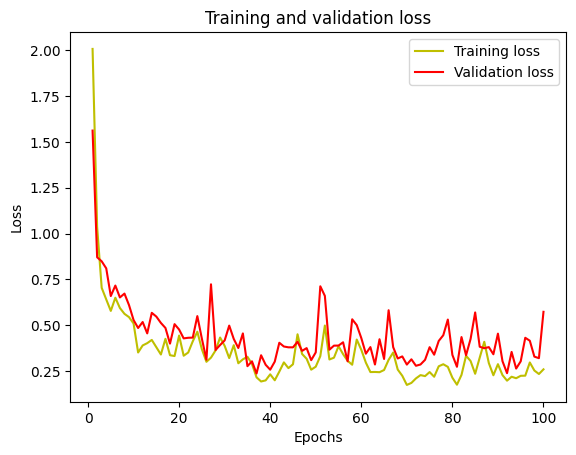

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [141]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [142]:
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9777777777777777
